#About the Dataset

**California Housing Prices**
The data contains information from the 1990 California census. The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. It does provide an accessible introductory dataset for the basics of machine learning.

In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house). Since these statistics are at the granularity of the district, they corresponds to averages or medians.

**Features Variables**
- **longitude**: longitude location
- **latitude**: latitude location
- **housingMedianAge**: Median age of a house within a block
- **totalRooms**: Total number of rooms within a block
- **totalBedrooms**: Total number of bedrooms within a block
- **population**: Total number of people residing within a block
- **households**: Total number of households, a group of people residing within a home unit, for a block
- **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
- **oceanProximity**: Location of the house away from ocean/sea
Note: Califorrnia Population in 1990 is 29.95 million


**Target Variable**
**median_house_value**: Median value of houses, the target variable for prediction.

#Load the Dataset

In [ ]:
# Import the usual packages
import pandas as pd
import numpy as np

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Load all the data files
data_path = '/content/drive/MyDrive/SRH'

In [ ]:
df = pd.read_csv(data_path +'/housing.csv')

The target contains the median of the house value for each district. Therefore, this problem is a regression problem.


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#Preparing and Processing the Data
- Checking for missing Values
- Checking for outliers and incorrect information

In [ ]:
#Check for missing Values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#Drop the missing records as it is less than 1%
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


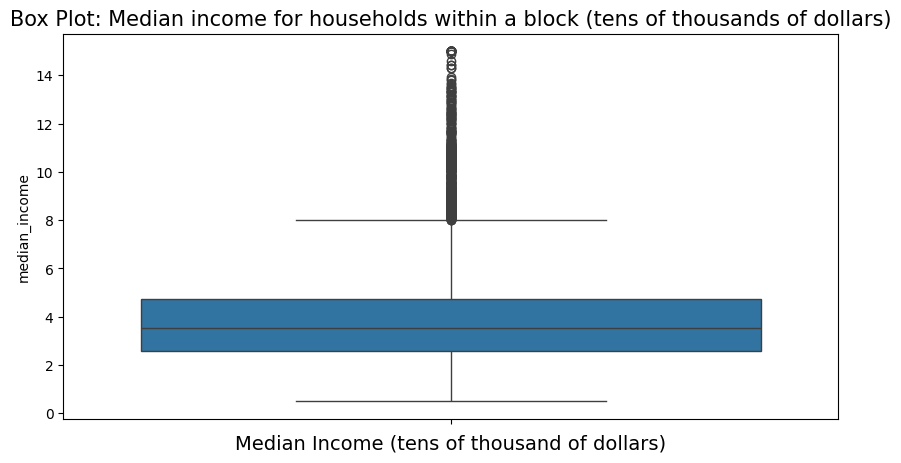

In [ ]:
#Box Plot to Look for Outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(df.median_income)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()

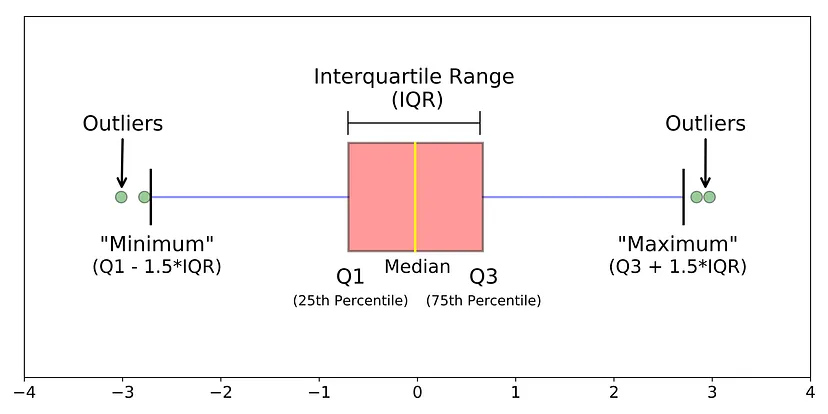

In [ ]:
#Count the total Outlier

# calculate IQR for column Height
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['median_income'] < Q1 - threshold * IQR) | (df['median_income'] > Q3 + threshold * IQR)]
outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY
134,-122.19,37.83,28.0,1326.0,184.0,463.0,190.0,8.2049,335200.0,NEAR BAY
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [ ]:
outliers.index

Int64Index([    0,     1,   131,   134,   135,   137,   154,   155,   407,
              409,
            ...
            20377, 20380, 20382, 20389, 20421, 20426, 20427, 20428, 20436,
            20503],
           dtype='int64', length=670)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:

# drop rows containing outliers
df_new = df.drop(outliers.index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.2+ MB


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19763 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19763 non-null  float64
 1   latitude            19763 non-null  float64
 2   housing_median_age  19763 non-null  float64
 3   total_rooms         19763 non-null  float64
 4   total_bedrooms      19763 non-null  float64
 5   population          19763 non-null  float64
 6   households          19763 non-null  float64
 7   median_income       19763 non-null  float64
 8   median_house_value  19763 non-null  float64
 9   ocean_proximity     19763 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
type(df_new)

pandas.core.frame.DataFrame

In [ ]:
df_new = df_new.reset_index(drop=True)

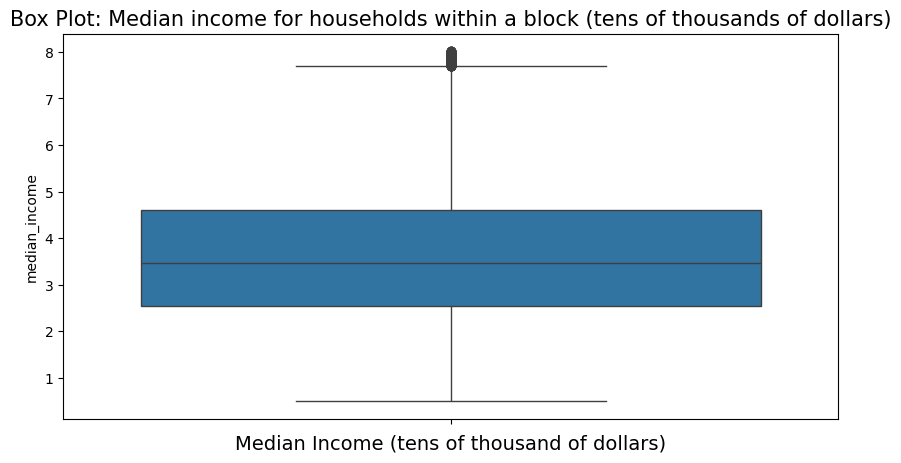

In [ ]:
#Box Plot to Look for Outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(df_new.median_income)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()

In [ ]:
df_new.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#Data Visualisation

- Effective data visualization is key in understanding the features and relationships within your dataset. We will use Matplotlib and Seaborn, two popular Python libraries, for our visualizations.

**Introduction to Matplotlib and Seaborn**:

**Matplotlib**: A widely used Python plotting library that offers a range of static, animated, and interactive plots.

**Seaborn**: Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.


In [ ]:
#Import Libraries for Visualisation
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_new.head()
df=df_new

**Relation Plot**

Ideal for visualizing the relationship between two numerical variables.

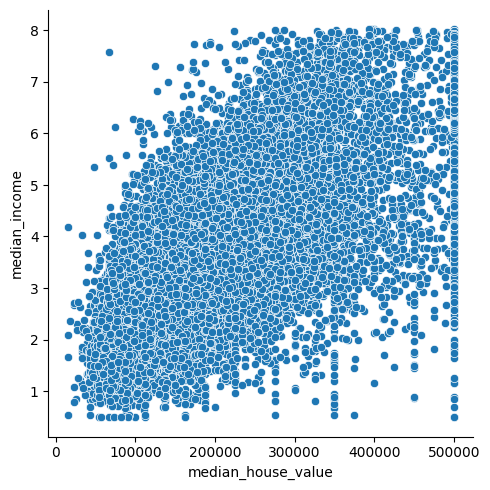

In [ ]:
sns.relplot(x='median_house_value', y='median_income', data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19763 entries, 0 to 19762
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19763 non-null  float64
 1   latitude            19763 non-null  float64
 2   housing_median_age  19763 non-null  float64
 3   total_rooms         19763 non-null  float64
 4   total_bedrooms      19763 non-null  float64
 5   population          19763 non-null  float64
 6   households          19763 non-null  float64
 7   median_income       19763 non-null  float64
 8   median_house_value  19763 non-null  float64
 9   ocean_proximity     19763 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


**Pairplot**

To plot multiple pairwise bivariate distributions in a dataset.

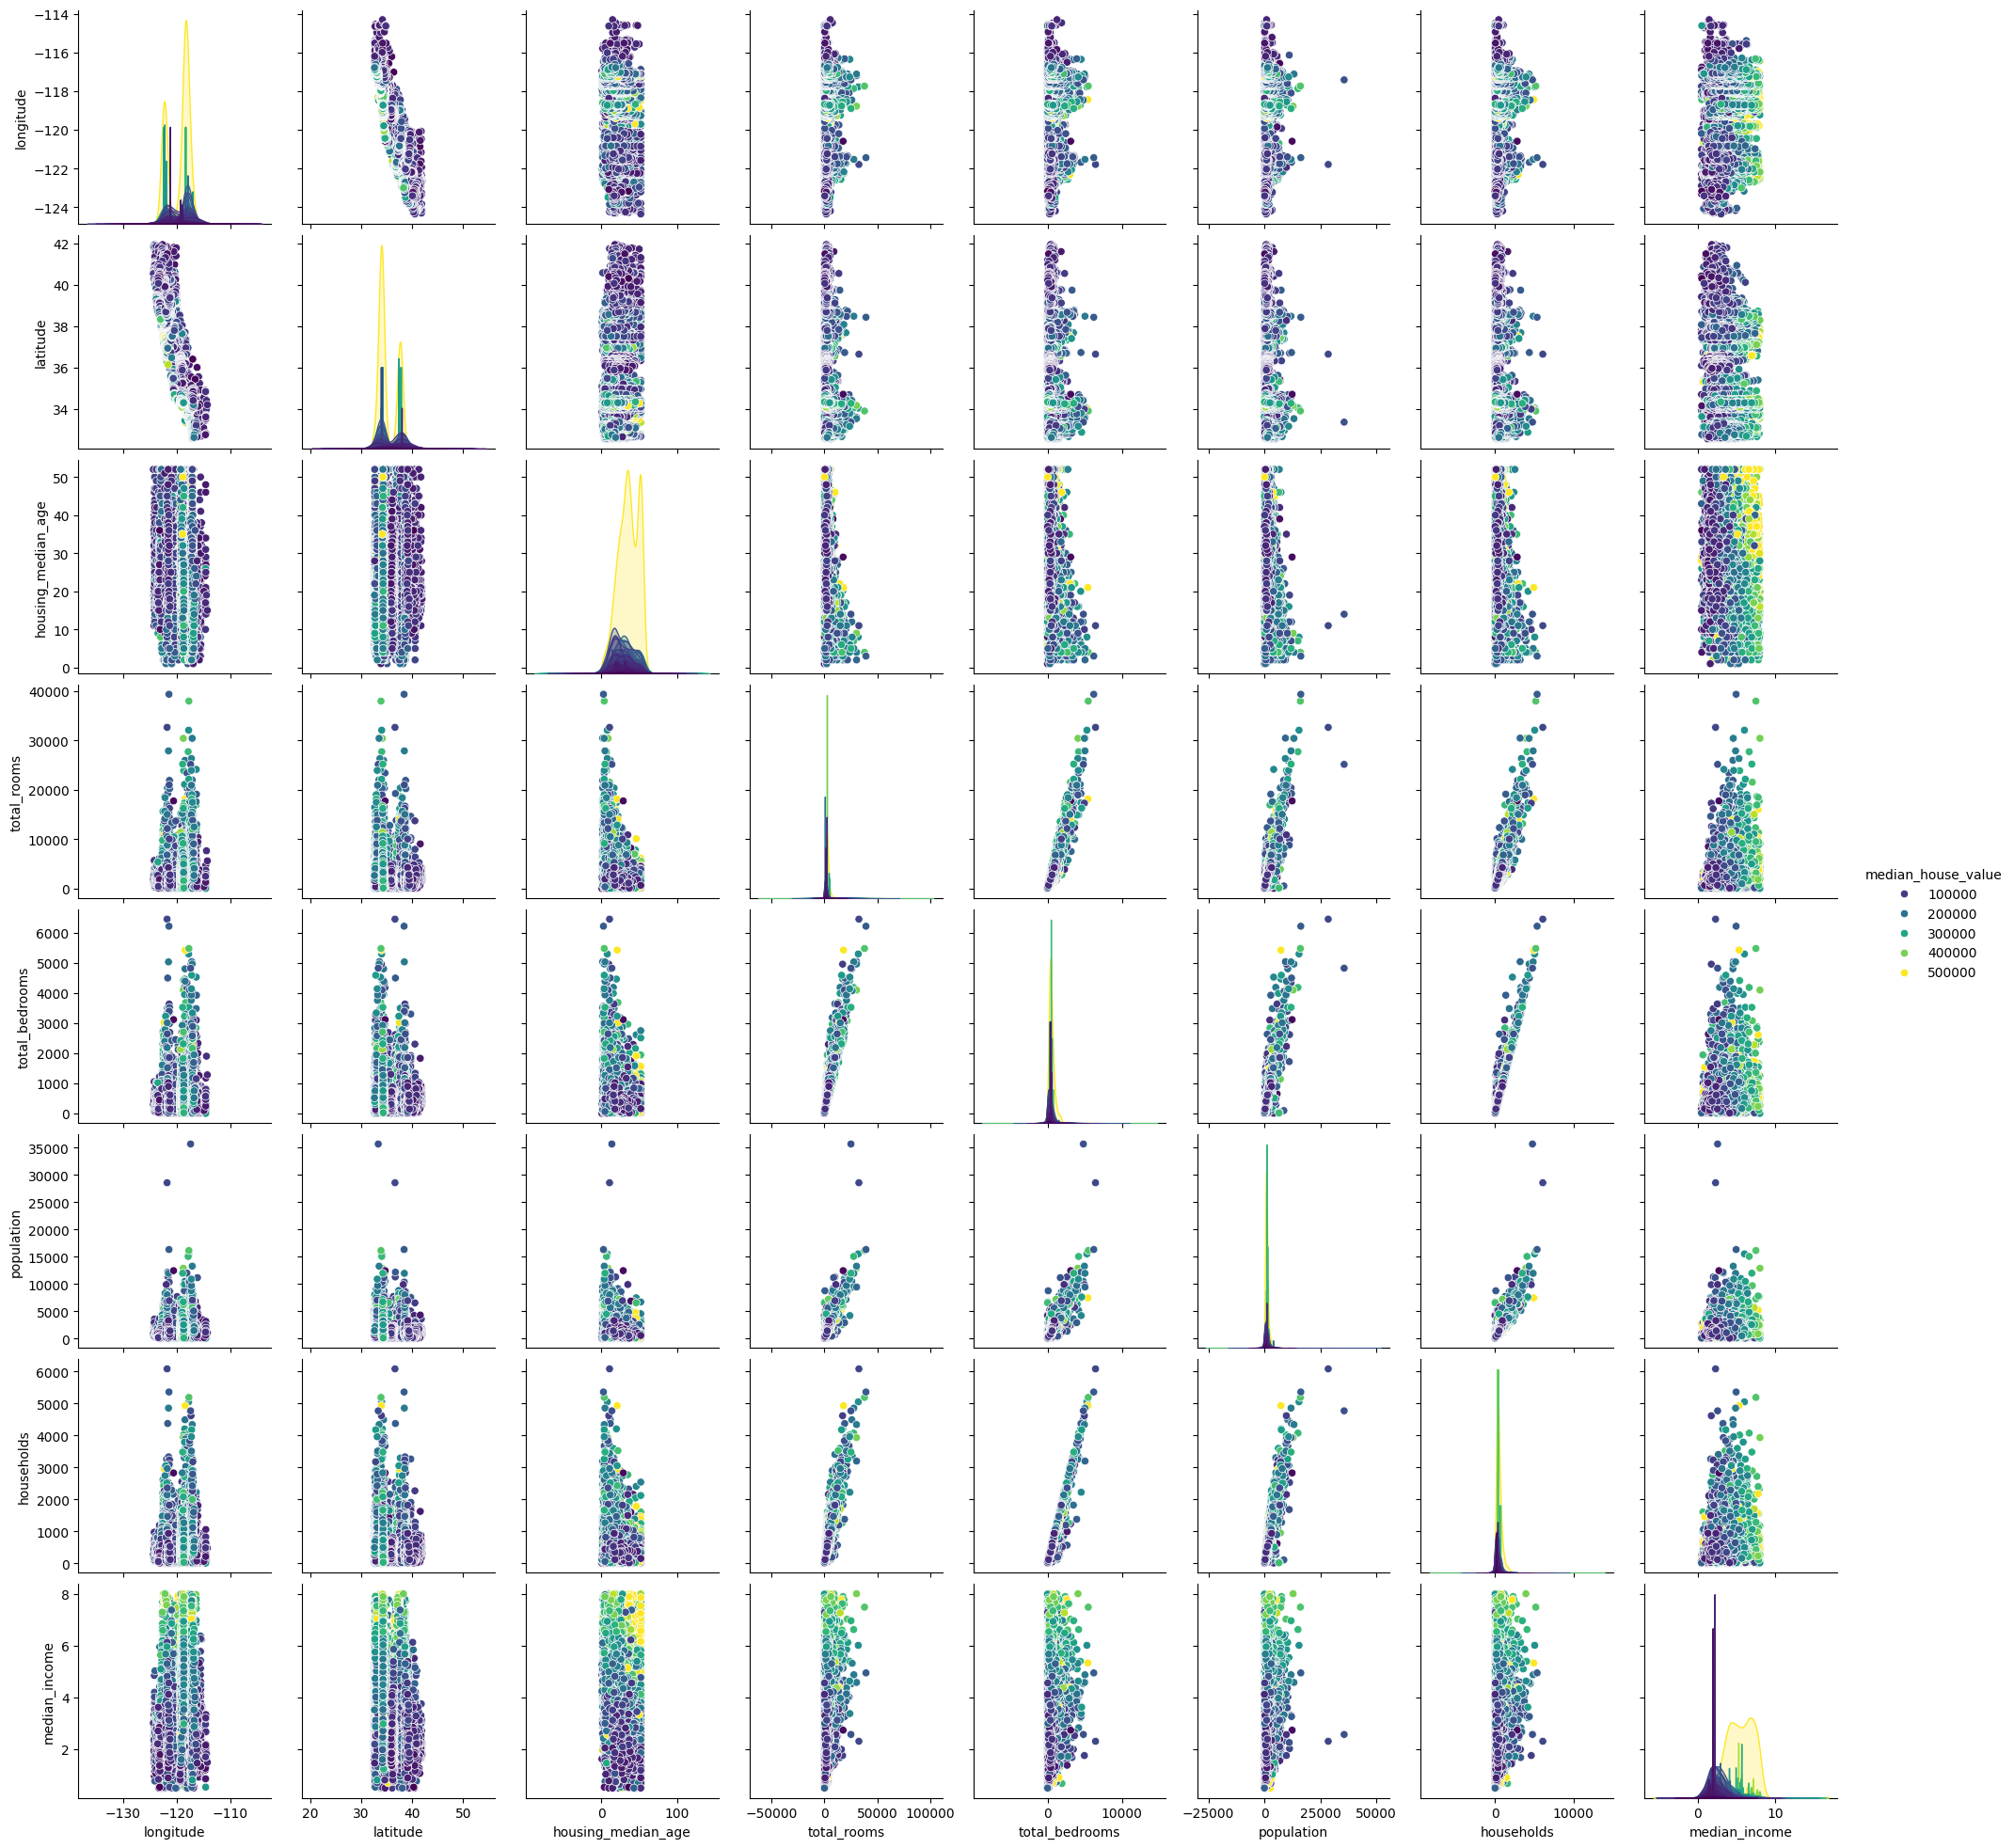

In [ ]:
sns.pairplot(data=df, hue="median_house_value", palette="viridis")

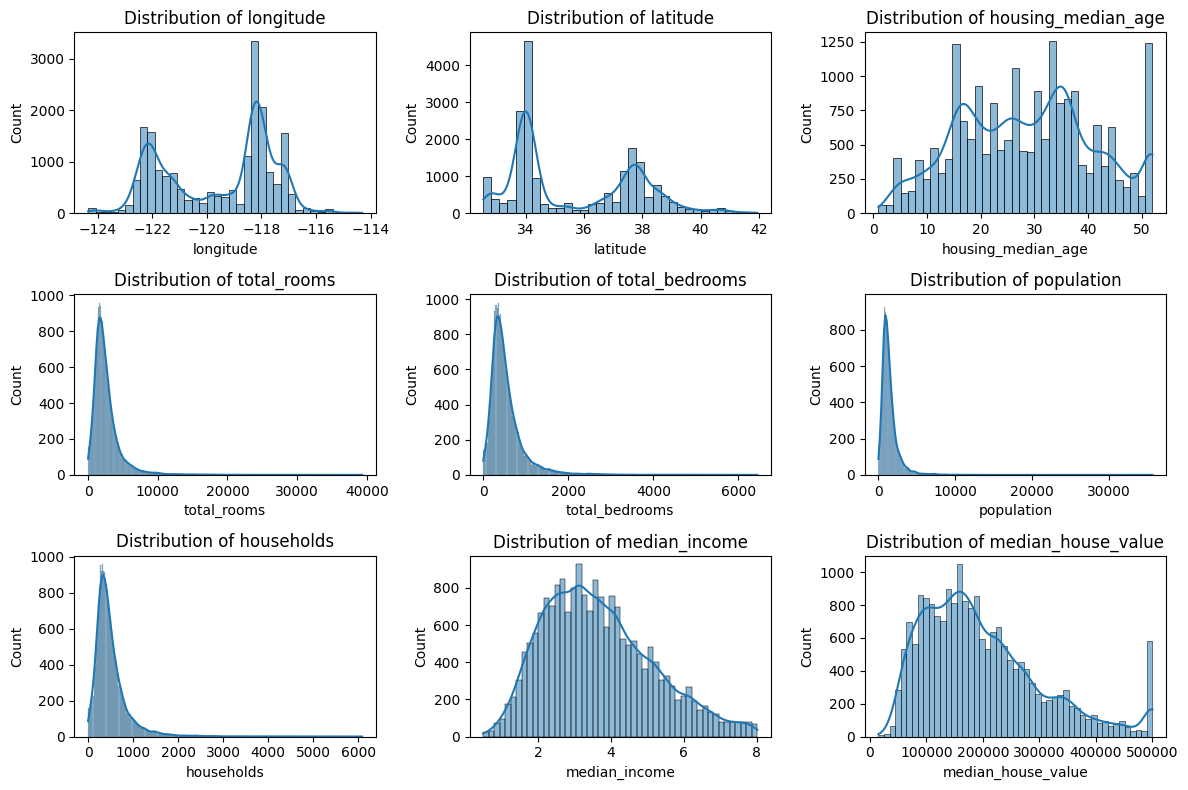

In [ ]:
#Distribution of Numerical Columns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

We can first focus on features for which their distributions would be more or less expected.

- The **median income** is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

- Regarding the **average house age**, the distribution is more or less uniform.

- The distribution of the **target variable** has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

- Focusing on the **total rooms**, **total bedrooms** and **population** is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

**Correlation**

Correlation coefficients quantify the association between variables or features of a dataset.

**Basics of Correlation**

Range: -1 to +1.

+1: Perfect positive correlation

-1: Perfect negative correlation

0: No correlation

In [ ]:
corr = df.corr()

<ipython-input-31-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


**Heatmap**

Interpreting a Correlation Heatmap

Color Scheme: Indicates correlation strength.
Warm colors (e.g., red): Strong positive correlation.
Cool colors (e.g., blue): Strong negative correlation.
Neutral colors: Little or no correlation.

Diagonal Line: Represents correlation of each variable with itself (always 1).

Symmetry: Heatmap is symmetric along the diagonal.

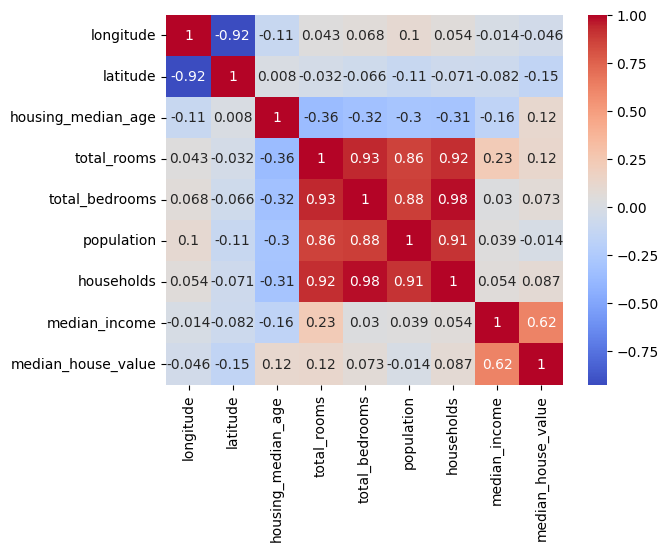

In [ ]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns,
            cmap = 'coolwarm', annot=True);

**Interpretations**

- High positive correlation between number of bedrooms and house price

- Weak correlation between age of house and house price.

It's noteworthy that multiple features, such as total_rooms, total_bedrooms, population, and households, exhibit a strong correlation with each other. High inter-correlation means that two (or more) features provide redundant information.
Consequently, it would be intriguing to explore whether eliminating some of these features impacts the performance of the model.

#Data Modeling

In [ ]:
#Define the dependent and the Independent Variables

y = df['median_house_value']
X = df[['households','longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','median_income']]

##Evaluation Metrics

**Calculate the Accuracy of the Model**
Compare the actual values y with the predicted values. The error of the model is calculated as the average difference between the predicted and actual values for all the rows.

**MSE** : The mean square error is the average of the square of the difference between the observed and predicted values of a variable

Low RMSE values indicate that the model fits the data well and has more precise predictions. Conversely, higher values suggest more error and less precise predictions. The root mean square error is a non-standardized goodness-of-fit assessment corresponding to its standardized counterpart—R-squared.


**Coefficient of determination, or R2**  is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data.

It determines the proportion of variance in the dependent variable that can be explained by the independent variable.

R^2 score - value closer to 1 indicates model is close to perfection.

## Prepare the Data

When working with machine learning algorithms we need to keep in mind that our models (resulting algorithms) learn something based on one set of data, and we check whether they actually learned it using a separate set.

We use 2 types of datasets when we take our first steps towards machine learning:
- **Train set**: This is the subset of data that we use as input to the model in the 'training' step, that is when we teach the model about our problem.
- **Test set**: This is the subset of data that we use to feed into an already trained model in order to determine how well the model performs on said problem.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##Using Statsmodels OLS Method (Baseline Model with all the features)


In [ ]:
#Using the Statsmodel Library
import statsmodels.api as sm
m = sm.OLS(y_train, sm.add_constant(X_train)) #Adding constant column, mandatory for sm.OLS model
m_result = m.fit()
print(m_result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2775.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:49:06   Log-Likelihood:            -1.9856e+05
No. Observations:               15810   AIC:                         3.971e+05
Df Residuals:                   15801   BIC:                         3.972e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.382e+06    7.1

##Using Machine Learning - Linear Regression (Baseline Model with all features)

In [ ]:
# Import the relevant sklearn packages
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

#X_train, X_test, y_train, y_test

LinearRegression()

In [ ]:
#Make Predictions from the Model
ypred_lm = lm.predict(X_test)

In [ ]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Training Accuracy
print("train score :", lm.score(X_train, y_train))
#Test Accuracy
print("test score  :", lm.score(X_test, y_test))

print('-----------------------------')
print("R^2 Accuracy:", r2_score(y_test, ypred_lm))
print("Root Mean Squared Error:", mean_squared_error(y_test, ypred_lm, squared=False))
print('-----------------------------')

train score : 0.5842297928710488
test score  : 0.5788398281812168
-----------------------------
R^2 Accuracy: 0.5788398281812168
Root Mean Squared Error: 68307.15896611355
-----------------------------


In [ ]:
X_train

,households,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16337,354.0,-122.31,37.52,24.0,2328.0,335.0,969.0,354.0,7.7364
13333,1482.0,-116.09,34.15,13.0,9444.0,1997.0,4166.0,1482.0,2.6111
5797,449.0,-117.74,34.04,27.0,2215.0,440.0,1987.0,449.0,3.0429
4042,300.0,-118.24,34.12,41.0,1213.0,301.0,801.0,300.0,3.1806
10862,331.0,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121
...,...,...,...,...,...,...,...,...,...
2594,430.0,-115.54,32.97,41.0,2429.0,454.0,1188.0,430.0,3.0091
18173,203.0,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
10454,343.0,-117.88,33.78,26.0,1813.0,421.0,1235.0,343.0,3.5972
14360,449.0,-117.00,32.70,23.0,2785.0,468.0,1456.0,449.0,4.3714


##Linear Regression (Model with selected features)

In [ ]:
# Feature to include
X_train_fe = X_train[['median_income','longitude','housing_median_age','population','total_rooms','total_bedrooms']]
X_test_fe = X_test[['median_income','longitude','housing_median_age','population','total_rooms','total_bedrooms']]

In [ ]:
lm_fe = LinearRegression()
lm_fe.fit(X_train_fe,y_train)

LinearRegression()

In [ ]:
#Make Predictions from the Model
ypred_lm_fe = lm_fe.predict(X_test_fe)

In [ ]:

#Evaluate the Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Training Accuracy
print("train score :", lm_fe.score(X_train_fe, y_train))
#Test Accuracy
print("test score  :", lm_fe.score(X_test_fe, y_test))


print('-----------------------------')
print("R^2 Accuracy:", r2_score(y_test, ypred_lm_fe))
print("Root Mean Squared Error:", mean_squared_error(y_test, ypred_lm_fe, squared=False))
print('-----------------------------')

train score : 0.5103260370672955
test score  : 0.49992538670899545
-----------------------------
R^2 Accuracy: 0.49992538670899545
Root Mean Squared Error: 74432.04980499245
-----------------------------


##Random Forest Regressor

Random forests (RFs) are often better than linear regression models in several scenarios.

One of the key advantages of RFs is their ability to capture nonlinear relationships in the data without the need for explicit feature engineering or transformations.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rm = RandomForestRegressor()
rm.fit(X_train,y_train)

#X_train, X_test, y_train, y_test

RandomForestRegressor()

In [ ]:
#Make Predictions from the Model
ypred_rm = rm.predict(X_test)

In [ ]:
#Evaluate the Model
#Training Accuracy
print("train score :", rm.score(X_train, y_train))
#Test Accuracy
print("test score  :", rm.score(X_test, y_test))



print('-----------------------------')
print("R^2 Accuracy:", r2_score(y_test, ypred_rm))
print("Root Mean Squared Error:", mean_squared_error(y_test, ypred_rm, squared=False))
print('-----------------------------')

train score : 0.9693300843450874
test score  : 0.764896300152834
-----------------------------
R^2 Accuracy: 0.764896300152834
Root Mean Squared Error: 51035.49216437279
-----------------------------


**Random Forest** an ensemble learning method, is known for its ability to handle a large number of features and automatically select the most important ones. However, if the dataset contains a large number of irrelevant or redundant features, feature selection can still be beneficial.

#Feature Selection Techniques

There are various Feature selection techniques like:
 - **Variance Inflation Factor**

 Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

 - K Best Features
 - Kobuta
 - Recursive Feature Elimination


In [ ]:
#Feature Importance through Random Forest
rm.feature_importances_

array([0.01533606, 0.1863494 , 0.17092955, 0.08102228, 0.02805807,
       0.03104159, 0.04652612, 0.01562906, 0.42510788])

In [ ]:
X_train.head()

,households,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16337,354.0,-122.31,37.52,24.0,2328.0,335.0,969.0,354.0,7.7364
13333,1482.0,-116.09,34.15,13.0,9444.0,1997.0,4166.0,1482.0,2.6111
5797,449.0,-117.74,34.04,27.0,2215.0,440.0,1987.0,449.0,3.0429
4042,300.0,-118.24,34.12,41.0,1213.0,301.0,801.0,300.0,3.1806
10862,331.0,-117.97,33.73,27.0,2097.0,325.0,1217.0,331.0,5.7121


In [ ]:
feature_importance_dict = {'importance': rm.feature_importances_, 'feature': X_train.columns}
rm_feature = pd.DataFrame(data=feature_importance_dict).sort_values('importance', ascending=False)
rm_feature

,importance,feature
8,0.425108,median_income
1,0.186349,longitude
2,0.170930,latitude
3,0.081022,housing_median_age
6,0.046526,population
5,0.031042,total_bedrooms
4,0.028058,total_rooms
7,0.015629,households
0,0.015336,households


In [ ]:
# Feature to include
X_train_fe = X_train[['median_income','longitude','latitude','housing_median_age','population']]
X_test_fe = X_test[['median_income','longitude','latitude','housing_median_age','population']]

In [ ]:
rm_fe = RandomForestRegressor()
rm_fe.fit(X_train_fe,y_train)

#X_train, X_test, y_train, y_test

RandomForestRegressor()

In [ ]:
X_train_fe

,median_income,longitude,latitude,housing_median_age,population
16337,7.7364,-122.31,37.52,24.0,969.0
13333,2.6111,-116.09,34.15,13.0,4166.0
5797,3.0429,-117.74,34.04,27.0,1987.0
4042,3.1806,-118.24,34.12,41.0,801.0
10862,5.7121,-117.97,33.73,27.0,1217.0
...,...,...,...,...,...
2594,3.0091,-115.54,32.97,41.0,1188.0
18173,2.4330,-121.98,38.36,33.0,562.0
10454,3.5972,-117.88,33.78,26.0,1235.0
14360,4.3714,-117.00,32.70,23.0,1456.0


In [ ]:
X_test_fe

,median_income,longitude,latitude,housing_median_age,population
15332,3.5744,-122.45,37.76,31.0,2659.0
13976,4.2768,-117.18,32.84,32.0,823.0
81,0.8075,-122.28,37.81,52.0,346.0
1081,1.4048,-121.59,39.78,16.0,1063.0
6913,2.7022,-118.15,34.02,37.0,2195.0
...,...,...,...,...,...
12480,3.6817,-121.32,38.59,21.0,4674.0
390,4.2614,-122.28,37.88,52.0,769.0
16373,3.8684,-122.24,37.49,38.0,2561.0
17906,3.7896,-122.37,40.52,18.0,2269.0


In [ ]:
#Make Predictions from the Model
ypred_rm_fe = rm_fe.predict(X_test_fe)

In [ ]:
#Evaluate the Model
#Training Accuracy

print("train score :", rm_fe.score(X_train_fe, y_train))
#Test Accuracy
print("test score  :", rm_fe.score(X_test_fe, y_test))

lm_r2_score = r2_score(y_test, ypred_rm_fe)
lm_rmse = mean_squared_error(y_test, ypred_rm_fe)**(0.5)
# R^2 score - value closer to 1 indicates model is close to perfection.
print('-----------------------------')
print("R^2 Accuracy:", r2_score(y_test, ypred_rm_fe))
print("Root Mean Squared Error:", mean_squared_error(y_test, ypred_rm_fe, squared = False))
print('-----------------------------')

2503662116

train score : 0.9700062690646188
test score  : 0.7679880917236652
-----------------------------
R^2 Accuracy: 0.7679880917236652
Root Mean Squared Error: 50698.80390278353
-----------------------------


2503662116

#Model Assessment and Model Selection

Model Assessment : Estimating the prediction error of the model on the new data

Model Selection: Choose the model with the best performance (model with the smallest prediction error on the new data)

In [ ]:
#Summary of the Results

In [ ]:
df_results = pd.DataFrame( columns=['Model', 'R2 Score', 'RMSE'], index = [0])

df_results.iloc[0,0] = 'OLS Regression Model with all Features'
df_results.loc[1,'Model'] = 'Linear Regression Model with all Features'
df_results.loc[2,'Model'] = 'Linear Regression Model with Selected Features'
df_results.loc[3,'Model'] = 'Random Forest Regression with all Features'
df_results.loc[4,'Model'] = 'Random Forest Regression with Top 5 Features'

df_results.iloc[0,1] = 0.58
df_results.iloc[1,1] = r2_score(y_test, ypred_lm)
df_results.iloc[1,2] = mean_squared_error(y_test, ypred_lm, squared=False)
df_results.iloc[2,1] = r2_score(y_test, ypred_lm_fe)
df_results.iloc[2,2] = mean_squared_error(y_test, ypred_lm_fe, squared=False)
df_results.iloc[3,1] = r2_score(y_test, ypred_rm)
df_results.iloc[3,2] = mean_squared_error(y_test, ypred_rm, squared=False)

df_results.iloc[4,1] = r2_score(y_test, ypred_rm_fe)
df_results.iloc[4,2] = mean_squared_error(y_test, ypred_rm_fe, squared = False)

df_results.head()

,Model,R2 Score,RMSE
0,OLS Regression Model with all Features,0.58,NaN
1,Linear Regression Model with all Features,0.57884,68307.158966
2,Linear Regression Model with Selected Features,0.499925,74432.049805
3,Random Forest Regression with all Features,0.764896,51035.492164
4,Random Forest Regression with Top 5 Features,0.767988,50698.803903
